# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sp
import pandas as pd

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
cube = range(1,7)
dice = np.random.choice(cube, size = 10, replace= True)
ds_dice = pd.DataFrame(dice)
ds_dice


,0
0,4
1,1
2,1
3,6
4,5
5,2
6,3
7,6
8,2
9,6


#### 2.- Plot the results sorted by value.

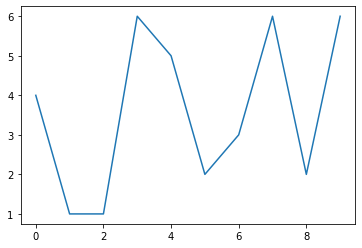

In [3]:
# your code here

plt.plot(dice)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([2., 2., 1., 1., 1., 3.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

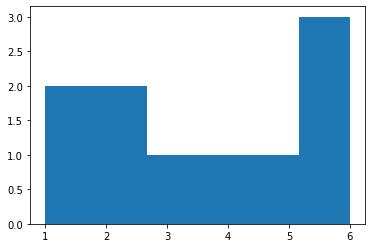

In [4]:
# your code here
plt.hist(ds_dice[0], bins = 6)

In [5]:
"""
In the first plot I can see which numbers were diced, in the second plot I can see how often which number was diced.
"""

'\nIn the first plot I can see which numbers were diced, in the second plot I can see how often which number was diced.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [195]:
# your code here
def calc_mean (x):
    dices = [x[i] for i in range(len(x))]
    return sum(dices)/len(dices)

mean_dice = calc_mean(dice)
mean_dice
#len(dice)

3.6

In [200]:
dice

array([4, 1, 1, 6, 5, 2, 3, 6, 2, 6])

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [217]:
# your code here
from collections import Counter
def mode_dice(x):
    mode_dice = [i for i in x]
    dict_dice = Counter(mode_dice)
    freq_distr = pd.DataFrame.from_dict(dict_dice,orient='index')
    return freq_distr

final = mode_dice(dice)
final

,0
4,1
1,2
6,3
5,1
2,2
3,1


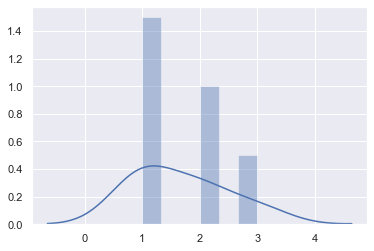

In [288]:
sns.distplot(final, bins= 6)

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [164]:
# your code here
ds_dice_sort = ds_dice.sort_values(by = 0)
dice_sort = list(ds_dice_sort[0])

def calc_median(dice_sort):
    if len(dice_sort)%2 != 0:
        return dice_sort[int((len(dice_sort)/2)+0.5)]
    else:
        return (dice_sort[(int((len(dice_sort)/2))-1)]+dice_sort[(int((len(dice_sort)/2)))])/2

median = calc_median(dice_sort)
median


3.5

In [163]:
len(dice_sort)/2

5.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [166]:
# your code here
# Calculate index od median for splitting Dataframe to calculate quartil low and high
def calc_index_median(dice_sort):
    if len(dice_sort)%2 != 0:
        x = int((len(dice_sort)/2))-1
        return x
    else:
        x = int((len(dice_sort)/2))
        return x
x = calc_index_median(dice_sort)
x

5

In [168]:
# Quartil low


dice_low = dice_sort[0:x]
quartil_low = calc_median(dice_low)
quartil_low

2

In [170]:
#Quartil high

dice_high = dice_sort[x:10]
quartil_high = calc_median(dice_high)

quartil_high

6

In [171]:
dice_sort

[1, 1, 2, 2, 3, 4, 5, 6, 6, 6]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

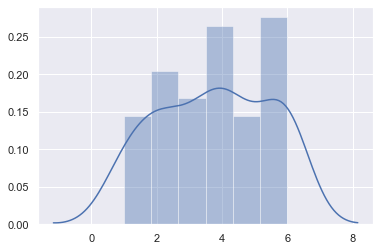

In [289]:
# your code here
import seaborn as sns

sns.set()

roll_100 = pd.read_csv(r'C:\Users\linda\Ironhack\Lesson_Statistics\lab-understanding-descriptive-stats\data\roll_the_dice_hundred.csv')
roll_100_sort = roll_100.sort_values(by="value")
roll_100_sort= roll_100_sort[["value"]]
roll_100_sort
sns.distplot(roll_100_sort, bins = 6)

In [212]:
"""
your comments here
"""


'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [211]:
# your code here
mean_dice_100 = calc_mean(roll_100_sort["value"])
mean_dice_100

3.74

#### 3.- Now, calculate the frequency distribution.


In [219]:
# your code here
freq_distr = mode_dice(roll_100_sort["value"])
freq_distr

,0
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

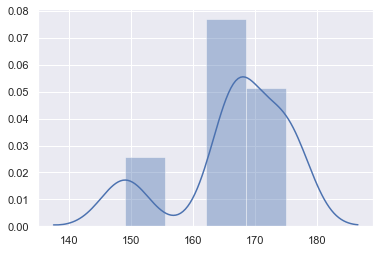

In [292]:
# your code here
sns.distplot(freq_distr, bins = 4)
#plt.hist(freq_distr)

In [16]:
"""
mostly of the numbers were 15 to 20 times diced.
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

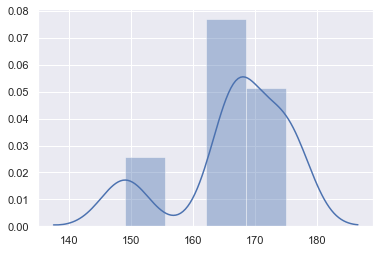

In [254]:
# your code here
roll_1000 = pd.read_csv(r'C:\Users\linda\Ironhack\Lesson_Statistics\lab-understanding-descriptive-stats\data\roll_the_dice_thousand.csv')
roll_1000_sort = roll_1000.sort_values(by="value")
#roll_1000_sort
roll_1000_sort= roll_1000_sort[["value","roll"]]
freq_distr = mode_dice(roll_1000_sort["value"])
freq_distr
sns.distplot(freq_distr)


In [18]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

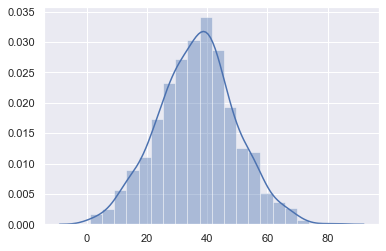

In [248]:
# your code here
age_pop = pd.read_csv(r'C:\Users\linda\Ironhack\Lesson_Statistics\lab-understanding-descriptive-stats\data\ages_population.csv')
sns.distplot(age_pop, bins= 20)

# mean: 35
#standard deviation: 27-50

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [258]:
# your code here
print("Mean: ", age_pop.mean())
print("Standard Deviation: ",age_pop.std())

Mean:  observation    36.56
dtype: float64
Standard Deviation:  observation    12.8165
dtype: float64


In [21]:
"""
36.56 +/- 12.8165 = 23.745-49.38
me: 27-50 

"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

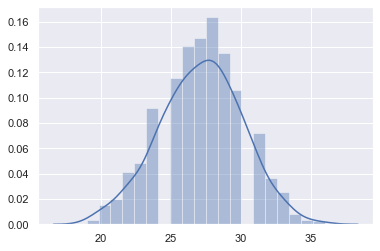

In [259]:
# your code here
age_pop_2 = pd.read_csv(r'C:\Users\linda\Ironhack\Lesson_Statistics\lab-understanding-descriptive-stats\data\ages_population2.csv')
sns.distplot(age_pop_2, bins= 20)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
the kurtosis seems to be closer to 0 than before.
There is also a gap at the ages 24 and 31.
And the population got younger then before -> mean ~ 27
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [260]:
# your code here
print("Mean: ", age_pop_2.mean())
print("Standard Deviation: ",age_pop_2.std())

Mean:  observation    27.155
dtype: float64
Standard Deviation:  observation    2.969814
dtype: float64


In [25]:
"""
Truely the mean age is younger then before and the standard deviation is smaller then before. Maybe they asked for the population age 2 
a special group of young professionals for example.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

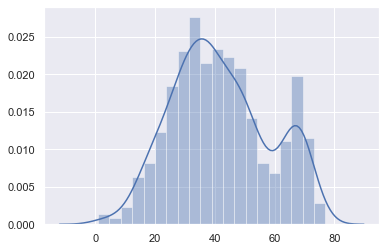

In [261]:
# your code here
age_pop_3 = pd.read_csv(r'C:\Users\linda\Ironhack\Lesson_Statistics\lab-understanding-descriptive-stats\data\ages_population3.csv')
sns.distplot(age_pop_3, bins= 20)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [262]:
# your code here
print("Mean: ", age_pop_3.mean())
print("Standard Deviation: ",age_pop_3.std())

Mean:  observation    41.989
dtype: float64
Standard Deviation:  observation    16.144706
dtype: float64


In [28]:
"""
The standard deviation is right skewed and the mean is now higher ~42, also the standard deviation is higher. 
I think now more different groups of age-classes were asked.
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [263]:
# your code here
age_pop_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [278]:
q1= np.percentile(age_pop_3.observation, 25)
q2 = np.percentile(age_pop_3.observation, 50)
q3 = np.percentile(age_pop_3.observation, 75)
median_3 = age_pop_3.median()
mean_3 = age_pop_3.mean()
print(q1,q2,q3, median_3, mean_3)

30.0 40.0 53.0 observation    40.0
dtype: float64 observation    41.989
dtype: float64


In [280]:
diff = median_3 -mean_3
diff


observation   -1.989
dtype: float64

In [30]:
"""
it´s more rigt skewed.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [286]:
# your code here
np.percentile(age_pop_3.observation, 82)

60.0

In [32]:
"""
The last 18% are over 60 years old.
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [33]:
# your code here

In [34]:
"""
your comments here
"""

'\nyour comments here\n'